# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | la foa
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | mus
Processing Record 6 of Set 1 | klyuchi
Processing Record 7 of Set 1 | bam
Processing Record 8 of Set 1 | rakvere
Processing Record 9 of Set 1 | jisr ez zarqa
City not found. Skipping...
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | keminmaa
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | crane
Processing Record 15 of Set 1 | hyesan
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | russkaya polyana
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | north battleford
Processing Record 22 of Set 1 | college
Processing Rec

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la foa,-21.7108,165.8276,22.61,53,1,3.63,NC,1724882539
1,waitangi,-43.9535,-176.5597,13.23,93,75,3.58,NZ,1724882094
2,invercargill,-46.4000,168.3500,11.12,76,55,2.68,NZ,1724882542
3,avarua,-21.2078,-159.7750,26.03,73,20,7.20,CK,1724882145
4,mus,39.0000,41.7500,20.99,36,0,2.10,TR,1724882527


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la foa,-21.7108,165.8276,22.61,53,1,3.63,NC,1724882539
1,waitangi,-43.9535,-176.5597,13.23,93,75,3.58,NZ,1724882094
2,invercargill,-46.4000,168.3500,11.12,76,55,2.68,NZ,1724882542
3,avarua,-21.2078,-159.7750,26.03,73,20,7.20,CK,1724882145
4,mus,39.0000,41.7500,20.99,36,0,2.10,TR,1724882527


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

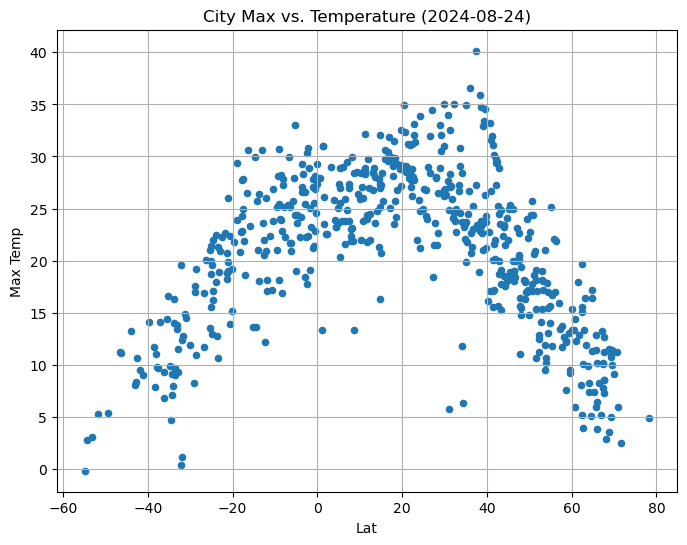

<Figure size 640x480 with 0 Axes>

In [13]:
# Build scatter plot for latitude vs. temperature
#Remove the rows with missing values in temperature
com_temp = city_data_df.loc[city_data_df['Max Temp'] != "?"]

#Set the "City_ID" as our index
com_temp = com_temp.set_index('City')

# Incorporate the other graph properties
com_temp.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,6), title="City Max vs. Temperature (2024-08-24)")

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")


#### Latitude Vs. Humidity

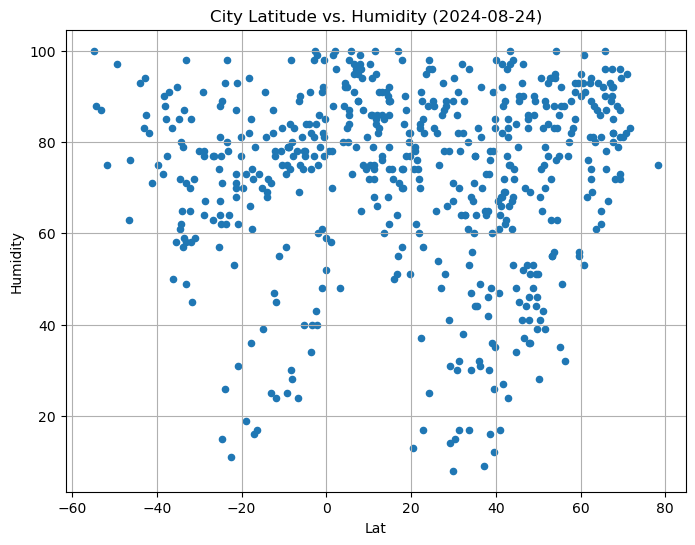

In [14]:
# Build the scatter plots for latitude vs. humidity

#Remove the rows with missing values in temperature
com_temp = city_data_df.loc[city_data_df['Max Temp'] != "?"]

#Set the "City_ID" as our index
com_temp = com_temp.set_index('City')

# Incorporate the other graph properties
com_temp.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,6), title="City Latitude vs. Humidity (2024-08-24)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

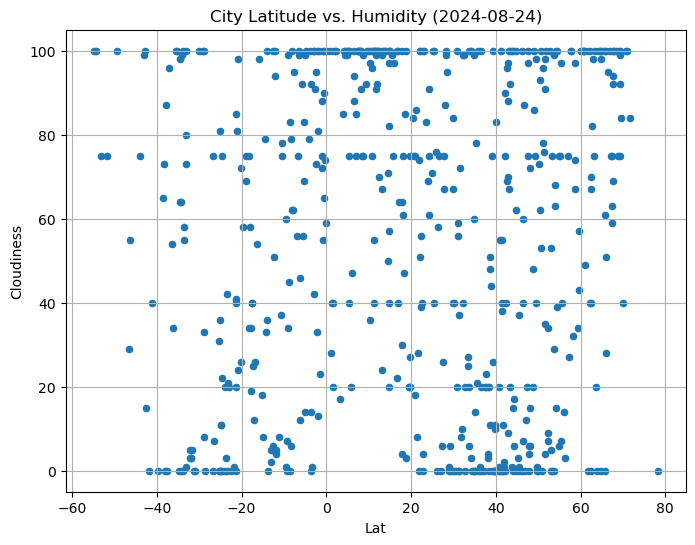

In [15]:
# Build the scatter plots for latitude vs. cloudiness
#Remove the rows with missing values in latitude
com_temp = city_data_df.loc[city_data_df['Max Temp'] != "?"]

#Set the "City_ID" as our index
com_temp = com_temp.set_index('City')

# Incorporate the other graph properties
com_temp.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,6), title="City Latitude vs. Humidity (2024-08-24)")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

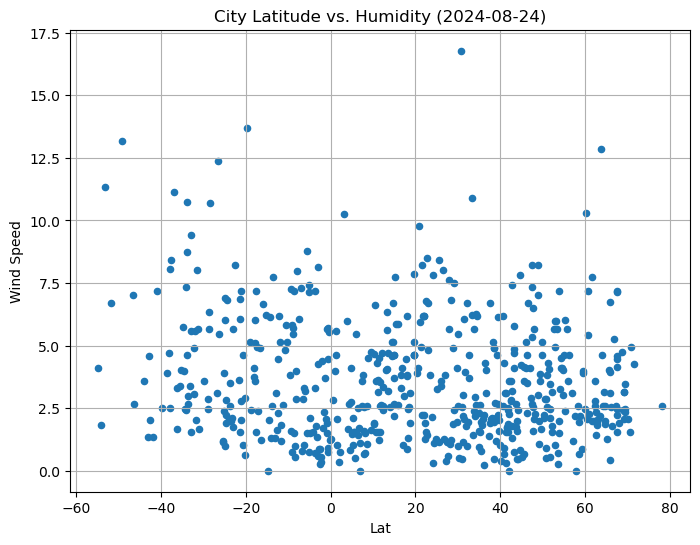

In [17]:
# Build the scatter plots for latitude vs. wind speed
#Remove the rows with missing values in latitude
com_temp = city_data_df.loc[city_data_df['Max Temp'] != "?"]

#Set the "City_ID" as our index
com_temp = com_temp.set_index('City')

# Incorporate the other graph properties
com_temp.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,6), title="City Latitude vs. Humidity (2024-08-24)")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, title):
     # Calculate the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']>0)])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,mus,39.0000,41.7500,20.99,36,0,2.10,TR,1724882527
5,klyuchi,52.2667,79.1667,12.89,84,7,1.54,RU,1724882226
6,bam,29.1060,58.3570,30.52,14,0,2.41,IR,1724882546
7,rakvere,59.3464,26.3558,13.03,93,34,0.86,EE,1724882547
9,keminmaa,65.8596,24.8228,12.87,100,0,3.09,FI,1724882551


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=pd.DataFrame(city_data_df.loc[(city_data_df['Lat']<0)])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la foa,-21.7108,165.8276,22.61,53,1,3.63,NC,1724882539
1,waitangi,-43.9535,-176.5597,13.23,93,75,3.58,NZ,1724882094
2,invercargill,-46.4000,168.3500,11.12,76,55,2.68,NZ,1724882542
3,avarua,-21.2078,-159.7750,26.03,73,20,7.20,CK,1724882145
8,grytviken,-54.2811,-36.5092,2.74,88,100,1.84,GS,1724882549


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: R^2 = 0.5076


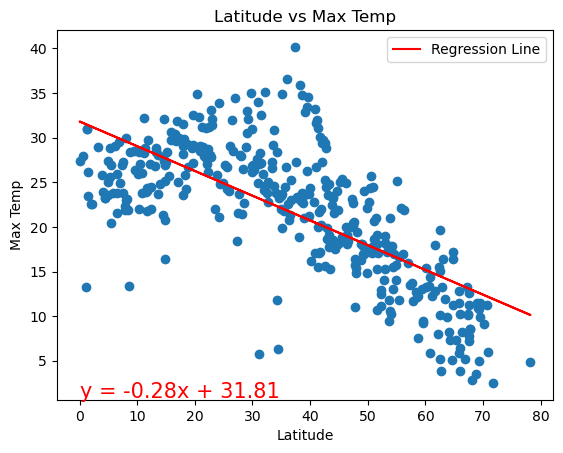

In [41]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
# Create scatter plot
plt.scatter(x, y)

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

 # Create regression line
plt.plot(x, slope*x + intercept, color='r', label='Regression Line')
# Add equation and r-squared value to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
r_squared = f'R^2 = {r_value**2:.4f}'
plt.annotate(equation,(0.1, 0.9),fontsize=15,color="red")


plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r^2-value is: {r_squared}")
plt.title("Latitude vs Max Temp")
plt.legend()
plt.show()

The r^2-value is: R^2 = 0.6621


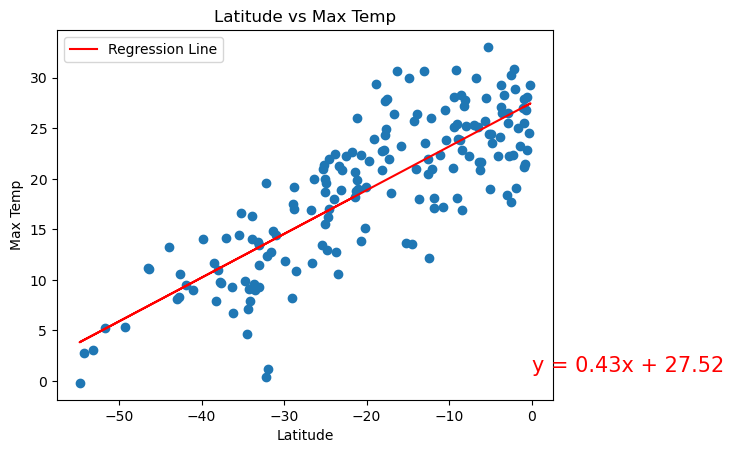

In [33]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
# Create scatter plot
plt.scatter(x, y)

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

 # Create regression line
plt.plot(x, slope*x + intercept, color='r', label='Regression Line')
# Add equation and r-squared value to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
r_squared = f'R^2 = {r_value**2:.4f}'
plt.annotate(equation,(0.1, 0.9),fontsize=15,color="red")
plt.annotate(r_squared, (5.8, 0.7), fontsize=15, color ="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r^2-value is: {r_squared}")
plt.title("Latitude vs Max Temp")
plt.legend()
plt.show()



In the northern hemisphere, the trend follows that the higher the temperature, the lower the latitude. This makes sense as the lower latitude is a location closer to the equator. In the southern hemisphere, the higher further you are from latitude zero (higher negative values), the lower the temperature.  This also makes sense becuase the the further you are from zero, the closer we are towards the South Pole. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: R^2 = 0.0020


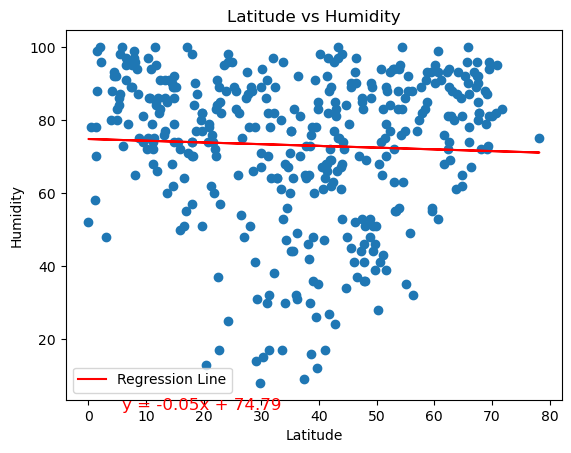

In [39]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
# Create scatter plot
plt.scatter(x, y)

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

 # Create regression line
plt.plot(x, slope*x + intercept, color='r', label='Regression Line')
# Add equation and r-squared value to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
r_squared = f'R^2 = {r_value**2:.4f}'
plt.annotate(equation,(5.8,0.8),fontsize=15,color="red")
plt.annotate(r_squared, (5.8, 0.7), fontsize=15, color ="red")

# Display the slope-intercept equation on the plot
slope_intercept_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(5.8, 0.6, slope_intercept_eq, fontsize=12, color='red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r^2-value is: {r_squared}")
plt.title("Latitude vs Humidity")
plt.legend()
plt.show()

The r^2-value is: R^2 = 0.0110


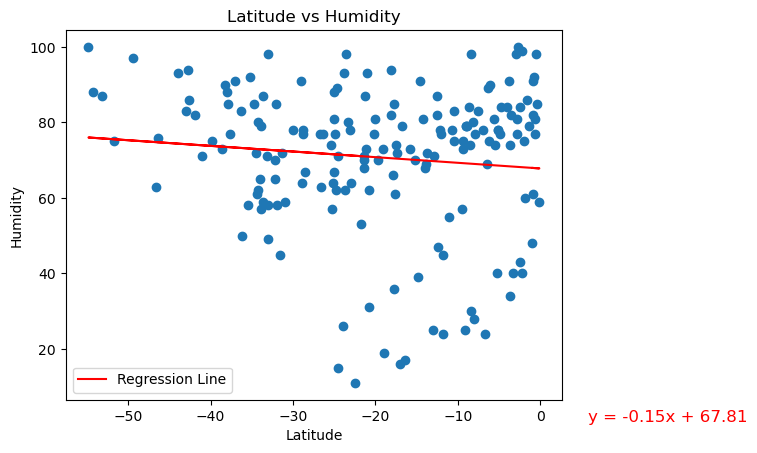

In [38]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

# Create scatter plot
plt.scatter(x, y)

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create regression line
plt.plot(x, slope*x + intercept, color='r', label='Regression Line')

# Add equation and r-squared value to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
r_squared = f'R^2 = {r_value**2:.4f}'
plt.annotate(equation, (5.8, 0.8), fontsize=15, color="red")
plt.annotate(r_squared, (5.8, 0.7), fontsize=15, color="red")
print(f"The r^2-value is: {r_squared}")

# Display the slope-intercept equation on the plot
slope_intercept_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(5.8, 0.6, slope_intercept_eq, fontsize=12, color='red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs Humidity")
plt.legend()
plt.show()# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

The linear relationship for both the Norther and Southern Hemisphere for Latitude as it correlates to humidity is weak to very weak.  The r2 value is weak for both at .01 for the Southern Hemisphere, and .02 for the Northern Hemisphere.  This would suggest that the average rainfall or moisture in the air is not more prevalent in any specific latitude range globally. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: R^2 = 0.0020


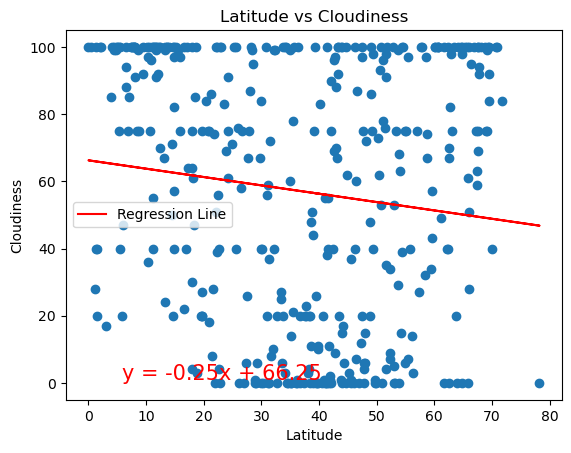

In [29]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
# Create scatter plot
plt.scatter(x, y)

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

 # Create regression line
plt.plot(x, slope*x + intercept, color='r', label='Regression Line')
# Add equation and r-squared value to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
print(f"The r^2-value is: {r_squared}")
r_squared = f'R^2 = {r_value**2:.4f}'
plt.annotate(equation,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs Cloudiness")
plt.legend()
plt.show()

The r^2-value is: R^2 = 0.0113


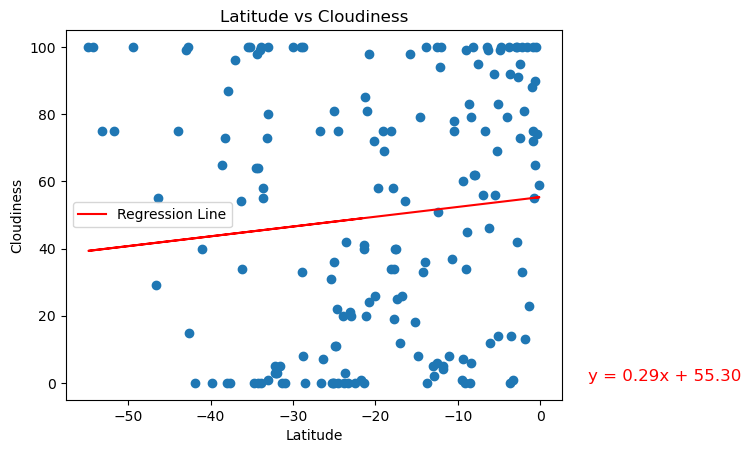

In [45]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
# Create scatter plot
plt.scatter(x, y)

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

 # Create regression line
plt.plot(x, slope*x + intercept, color='r', label='Regression Line')
# Add equation and r-squared value to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
r_squared = f'R^2 = {r_value**2:.4f}'
print(f"The r^2-value is: {r_squared}")
plt.annotate(equation,(5.8,0.8),fontsize=15,color="red")

# Display the slope-intercept equation on the plot
slope_intercept_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(5.8, 0.6, slope_intercept_eq, fontsize=12, color='red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs Cloudiness")
plt.legend()
plt.show()

The correlation between cloudiness and latitude for both the Southern and Northern Hemisphere is also weak to very weak.  The r squared value in the Northern Hemisphere is .002 and the R squared value in the Southern Hemisphere is .01. Latitude does not predict cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: R^2 = 0.0000


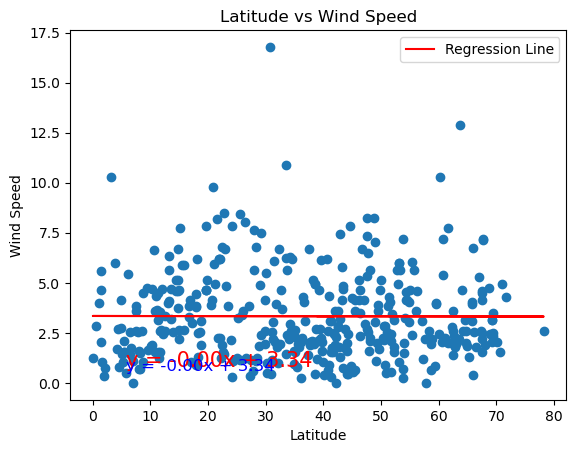

In [51]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
# Create scatter plot
plt.scatter(x, y)

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

 # Create regression line
plt.plot(x, slope*x + intercept, color='r', label='Regression Line')
# Add equation and r-squared value to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
r_squared = f'R^2 = {r_value**2:.4f}'
print(f"The r^2-value is: {r_squared}")
plt.annotate(equation,(5.8,0.8),fontsize=15,color="red")

# Display the slope-intercept equation on the plot
slope_intercept_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(5.8, 0.6, slope_intercept_eq, fontsize=12, color='blue')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs Wind Speed")
plt.legend()
plt.show()

The r^2-value is: R^2 = 0.0683


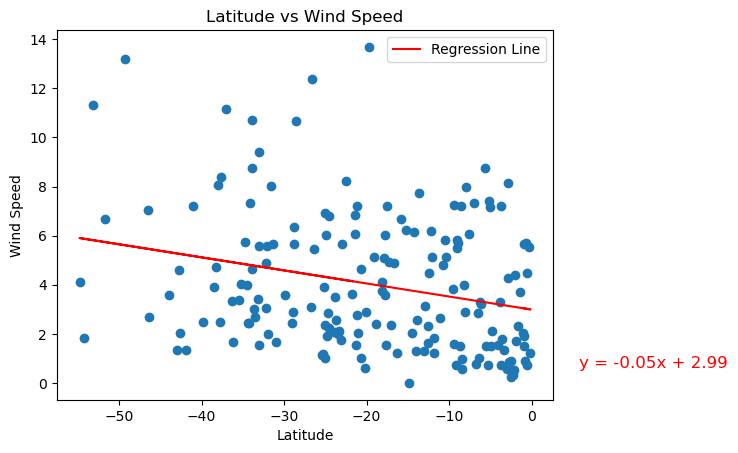

In [48]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
# Create scatter plot
plt.scatter(x, y)

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

 # Create regression line
plt.plot(x, slope*x + intercept, color='r', label='Regression Line')
# Add equation and r-squared value to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
print(f"The r^2-value is: {r_squared}")
r_squared = f'R^2 = {r_value**2:.4f}'
plt.annotate(equation,(5.8,0.8),fontsize=15,color="red")

# Display the slope-intercept equation on the plot
slope_intercept_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(5.8, 0.6, slope_intercept_eq, fontsize=12, color='red')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs Wind Speed")
plt.legend()
plt.show()

Latitude vs wind speed in the Northern Hemisphere has no corrleation at all. The model is not explaining any variation in the data.  The is a fairly strong correlation in the Southern Hemisphere however.  The r squared value is almost .7. The trend follows the closer you get to the equator in the Southern Hemisphere, the lower the wind speed. 